In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import datetime

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import math
import numpy as np

In [2]:
data = sqlite3.connect('/Users/cp/Documents/dsi/8a_kaggle/database.sqlite')
ascents_df = pd.read_sql_query("SELECT * FROM ascent where climb_type = 1", data)
ascents_df['date'] = pd.to_datetime(ascents_df['date'], unit = 's')
ascents_df['date'] = ascents_df.date.dt.round('1d')

In [3]:
ascents_df['name'] = ascents_df['name'].str.lower()

In [4]:
ascents_df['name'].head()

0           glycerin
1     nitroglycerine
2              babar
3    bengt johansson
4         mr olympia
Name: name, dtype: object

In [5]:
ascents_df = ascents_df[ascents_df.name !='?']

In [6]:

ascents_df = ascents_df[ascents_df['name']!='?']
ascents_df = ascents_df[ascents_df['name']!='???']
ascents_df = ascents_df[ascents_df['name']!='??']
ascents_df = ascents_df[ascents_df['name']!='unknown']
ascents_df = ascents_df[ascents_df['name']!='unnamed']
ascents_df = ascents_df[ascents_df['name']!='no name']
ascents_df = ascents_df[ascents_df['name']!='...']
ascents_df = ascents_df[ascents_df['name']!='Unknown']
ascents_df = ascents_df[ascents_df['name']!='-']
ascents_df = ascents_df[ascents_df['name']!='¿?']
ascents_df = ascents_df[ascents_df['name']!='name']
ascents_df = ascents_df[ascents_df['name']!='Name']
ascents_df = ascents_df[ascents_df['name']!="don't know name"]
ascents_df = ascents_df[ascents_df['name']!='????']

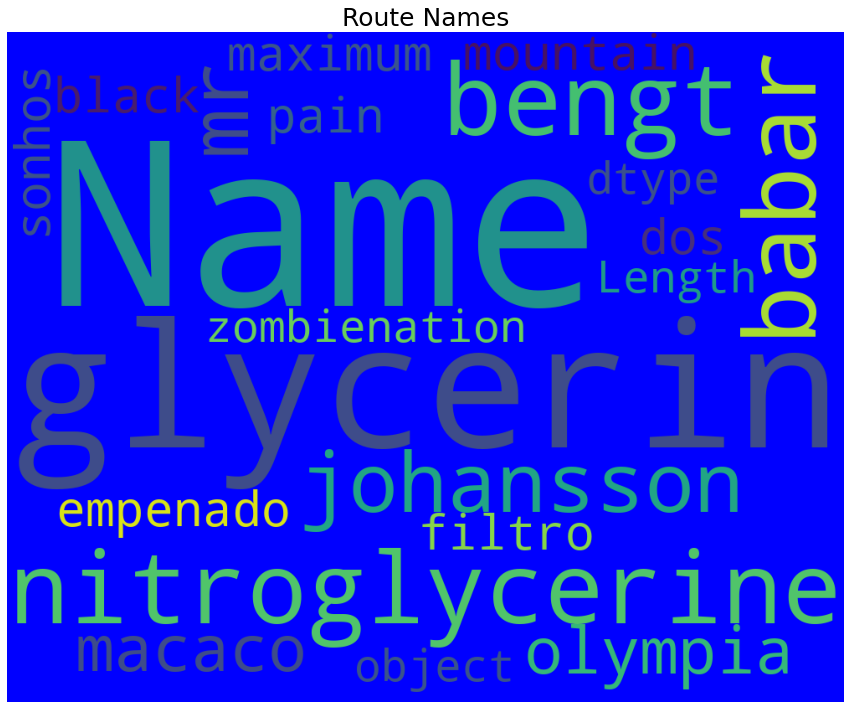

In [7]:
stopwords = STOPWORDS
wordcloud = WordCloud(background_color = 'blue', stopwords = stopwords, width = 1000, height = 800).generate(str(ascents_df['name']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Route Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('../images/route_names.png')
plt.show()

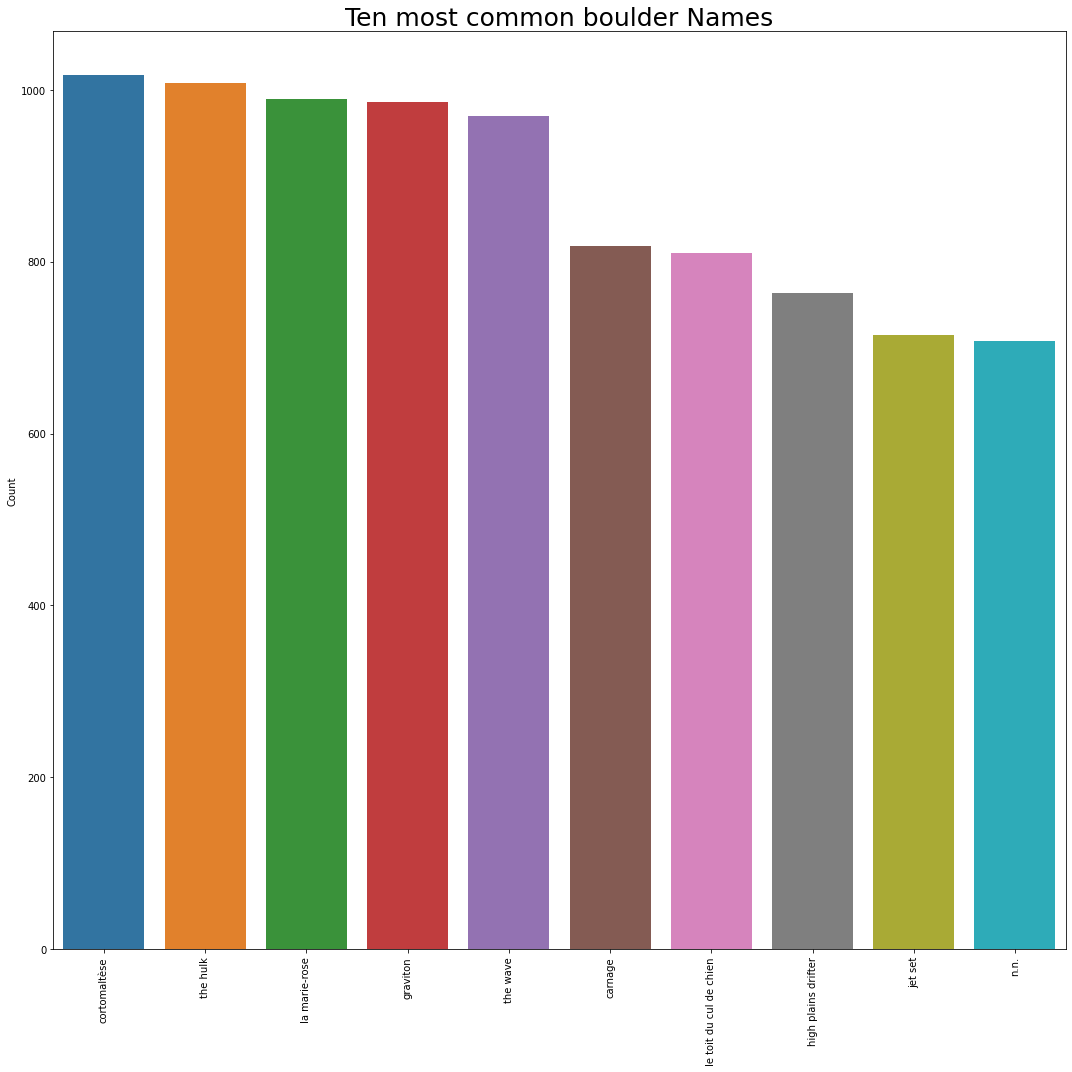

In [8]:
fontdict = {'fontsize':25}
ax = sns.countplot(x='name',data=ascents_df,order=pd.value_counts(ascents_df['name']).iloc[:10].index)
ax.set_title('Ten most common boulder Names', fontdict = fontdict)
ax.set_ylabel("Count")
ax.set_xlabel("")
# ax.set_xticklabels(rotation=90)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('../images/ten_most_common_bouldernames.png');

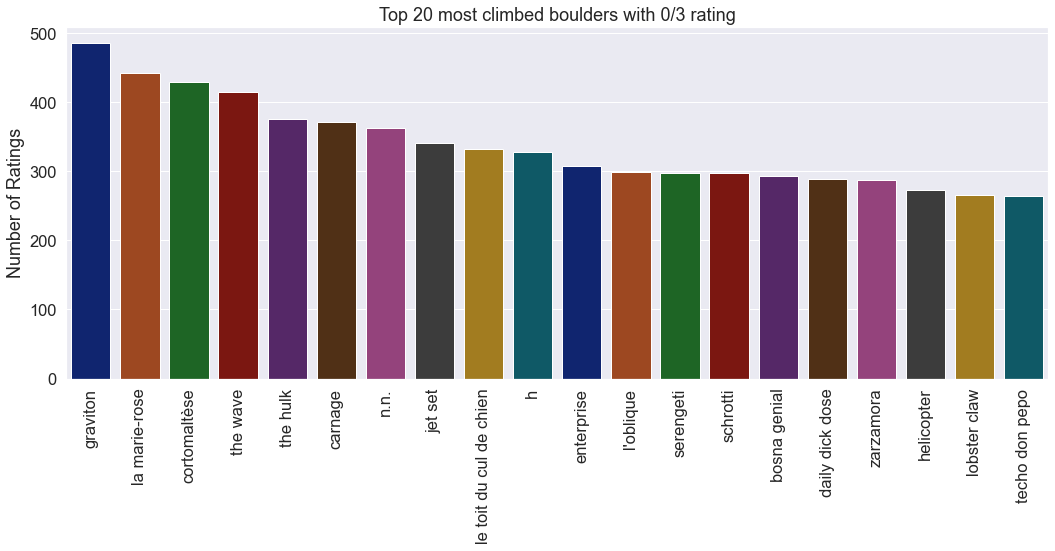

In [9]:
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(ascents_df.loc[ascents_df.rating == 0, "name"].value_counts())
boulder_name = list(rating.keys())
boulder_rating = list(rating.values())

sns_rating = sns.barplot(x = boulder_name[0:20], y = boulder_rating[0:20], palette = 'dark')

sns_rating.set_title('Top 20 most climbed boulders with 0/3 rating')
sns_rating.set_ylabel("Number of Ratings")
# sns_rating.set_xlabel("Drug Names")
# plt.savefig('drugs_rated_1.png')
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('../images/boulders_rated_0.png');

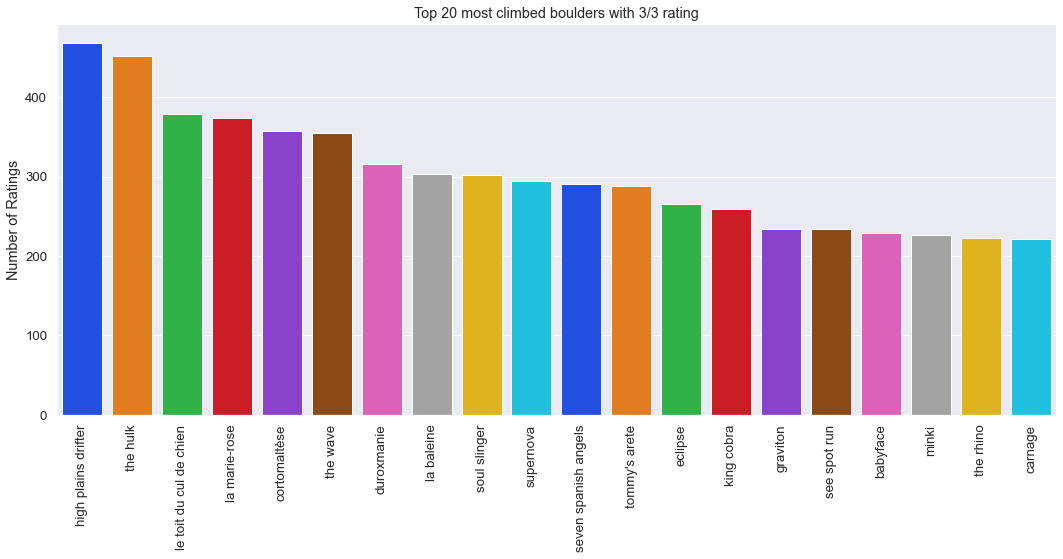

In [10]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(ascents_df.loc[ascents_df.rating == 3, "name"].value_counts())
boulder_name = list(rating.keys())
boulder_rating = list(rating.values())

sns_rating = sns.barplot(x = boulder_name[0:20], y = boulder_rating[0:20], palette = 'bright')

sns_rating.set_title('Top 20 most climbed boulders with 3/3 rating')
sns_rating.set_ylabel("Number of Ratings")
# sns_rating.set_xlabel("Boulder Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('../images/boulders_rated_3.png');

In [11]:
ascents_df.rating.value_counts()

0    515918
3    306210
2    251975
1    117178
Name: rating, dtype: int64

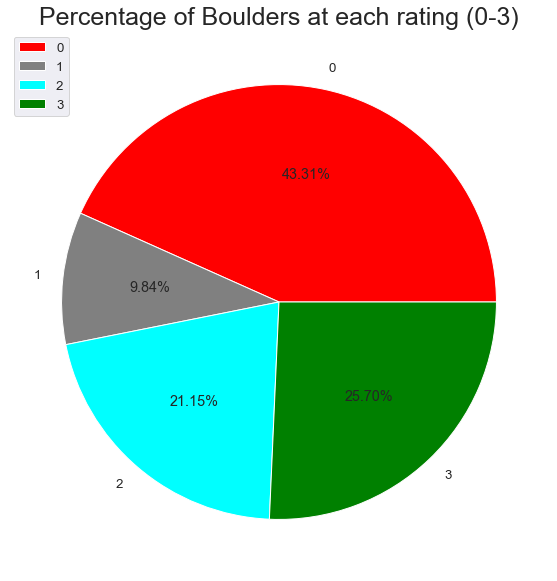

In [12]:
size = [515918, 117178, 251975, 306210]
colors = ['red','gray', 'cyan', 'green']
labels = '0','1', '2', '3'

# my_circle = plt.pie((0, 0), 0.7)

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Percentage of Boulders at each rating (0-3)', fontsize = 25)
p = plt.gcf()
# plt.gca().add_artist(my_circle)
plt.legend()
plt.savefig('../images/pie_chart_boulder_rating_distribution.png')
plt.show()

/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


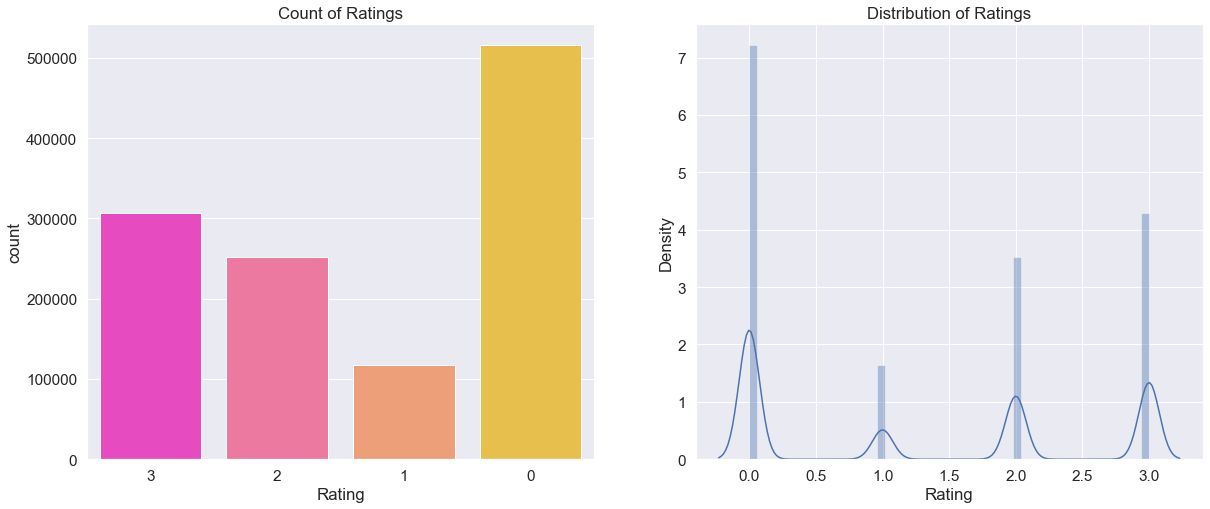

In [13]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(ascents_df['rating'], palette = 'spring', order = list(range(3, -1, -1)), ax = ax[0])
sns_2 = sns.distplot(ascents_df['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")
plt.savefig('../images/count_of_ratings_w_dist_ratings.png')

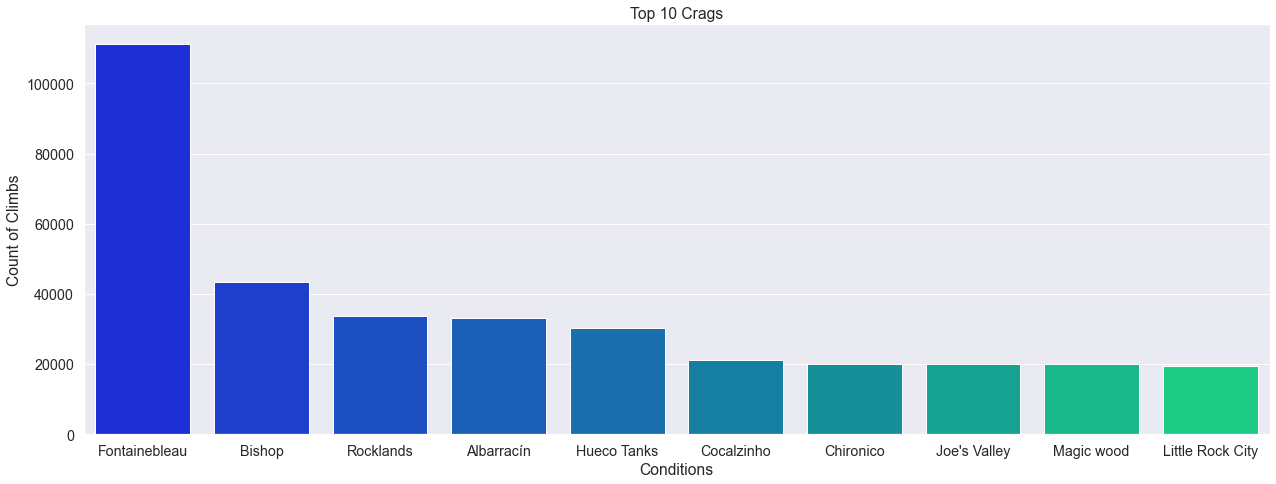

In [14]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(ascents_df['crag'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 Crags")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count of Climbs")
plt.tight_layout()
plt.savefig('../images/top10_crags_for_boulders.png');

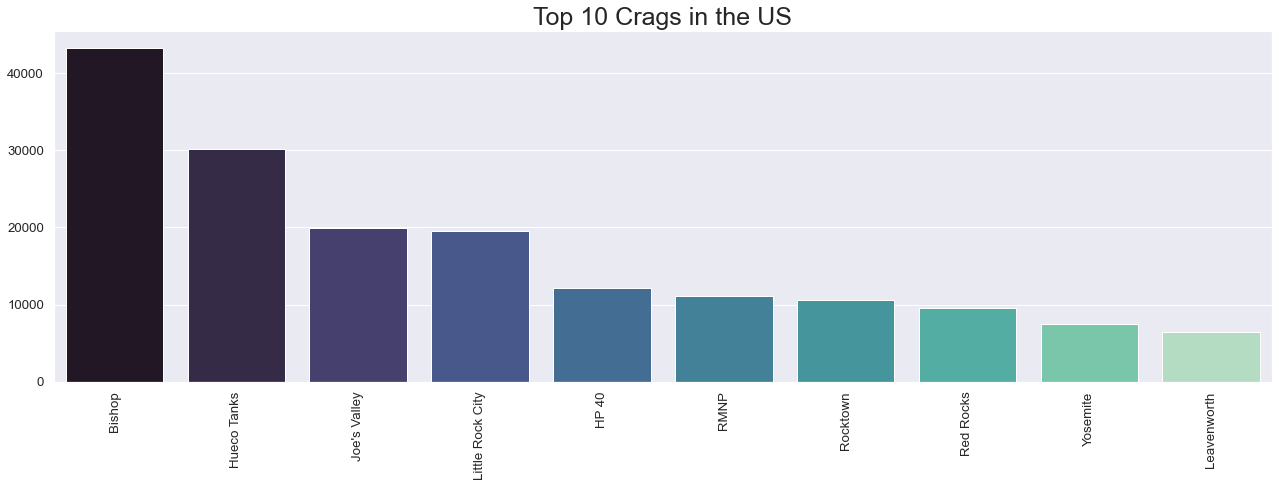

In [15]:
df1 = ascents_df[ascents_df['country'] == 'USA']['crag'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'mako')
# sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Crags in the US", fontsize = 25)
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.savefig('../images/top_crags_for_boulders_USA.png');

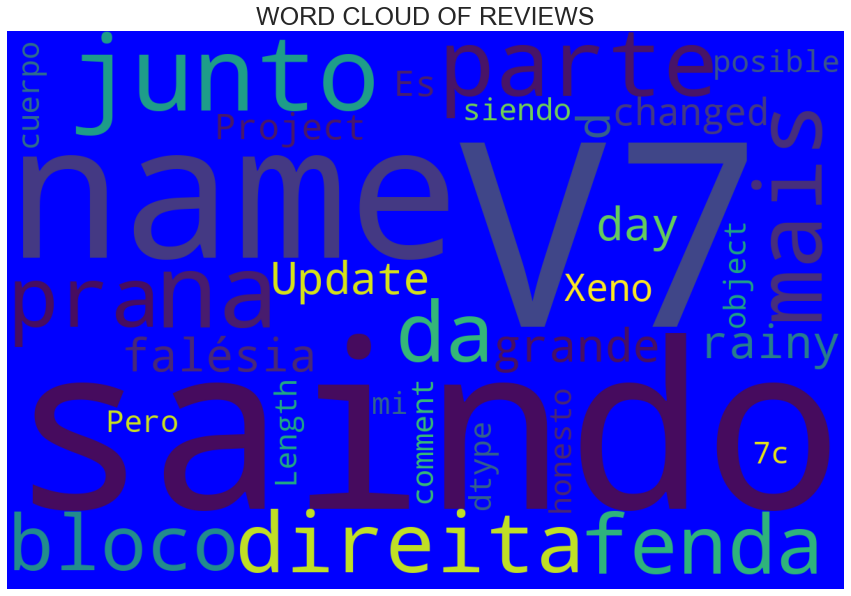

In [16]:
wordcloud = WordCloud(background_color = 'blue', stopwords = stopwords, width = 1200, height = 800).generate(str(ascents_df['comment']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('../images/word_cloud_reviews_all.png')
plt.show()

In [17]:
ascents_df.loc[(ascents_df['rating'] >= 2), 'Review_Sentiment'] = 2
ascents_df.loc[(ascents_df['rating'] >= 1) & (ascents_df['rating'] < 2), 'Review_Sentiment'] = 1

ascents_df.loc[(ascents_df['rating'] < 1), 'Review_Sentiment'] = 0

ascents_df['Review_Sentiment'].value_counts()

2.0    558185
0.0    515918
1.0    117178
Name: Review_Sentiment, dtype: int64

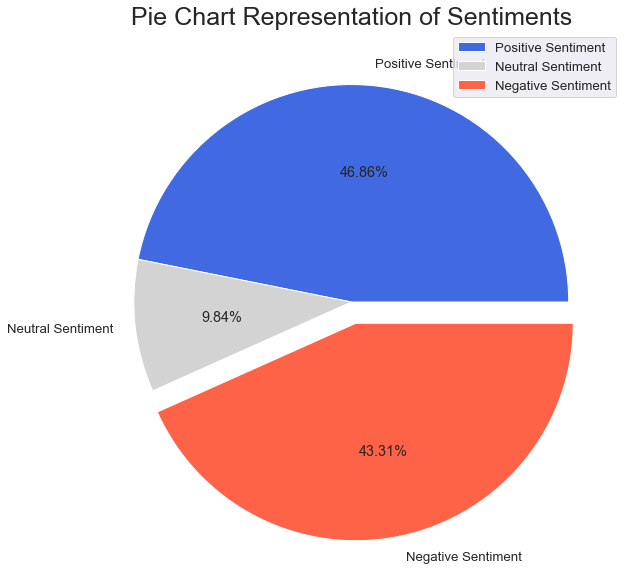

In [18]:
size = [558185, 117178, 515918]
colors = ['royalblue','lightgray' ,'tomato']
labels = "Positive Sentiment",'Neutral Sentiment', "Negative Sentiment"
explode = [0, 0,0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.savefig('../images/pos_neutral_neg_sentiment.png')
plt.show()

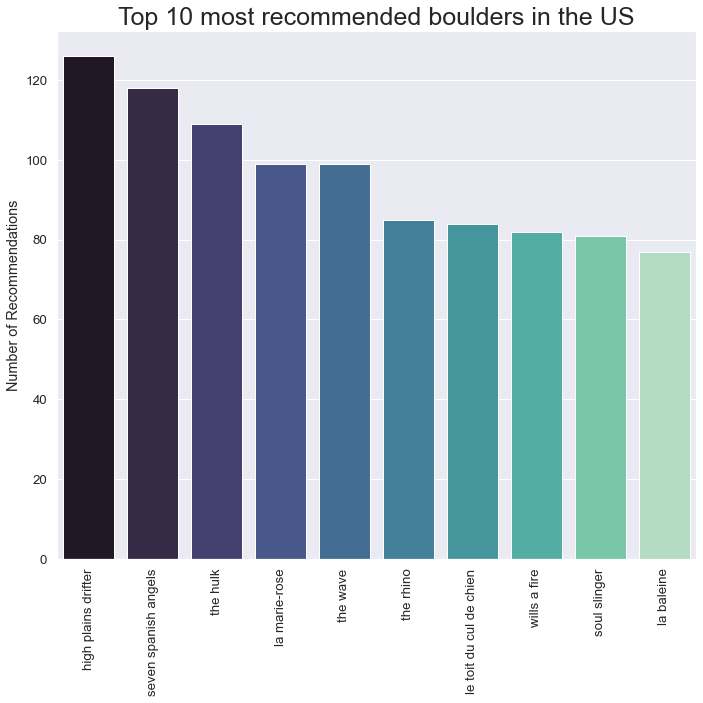

In [19]:
df1 = ascents_df[ascents_df['user_recommended'] == 1]['name'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'mako')
# sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 most recommended boulders in the US", fontsize = 25)
plt.setp(sns_.get_xticklabels(), rotation = 90)
sns_.set_ylabel("Number of Recommendations")
plt.tight_layout()
plt.savefig('../images/most_recommended_boulder_usa.png')

In [20]:
ascents_df['comment'][ascents_df['Review_Sentiment'] == 2].isna()

5          False
6          False
7          False
8          False
12         False
           ...  
1236173    False
1236174    False
1236177    False
1236188    False
1236200    False
Name: comment, Length: 558185, dtype: bool

In [21]:
positive_sentiments = " ".join([text for text in ascents_df['comment'][ascents_df['Review_Sentiment'] == 2]])

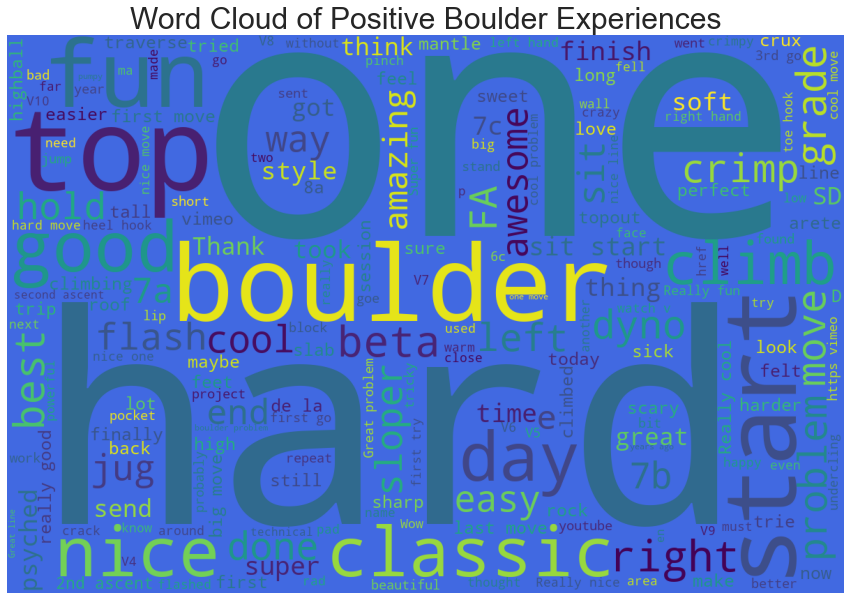

In [22]:
wordcloud = WordCloud(background_color = 'royalblue', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Boulder Experiences', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('../images/word_cloud_postive_boulders.png')
plt.show()

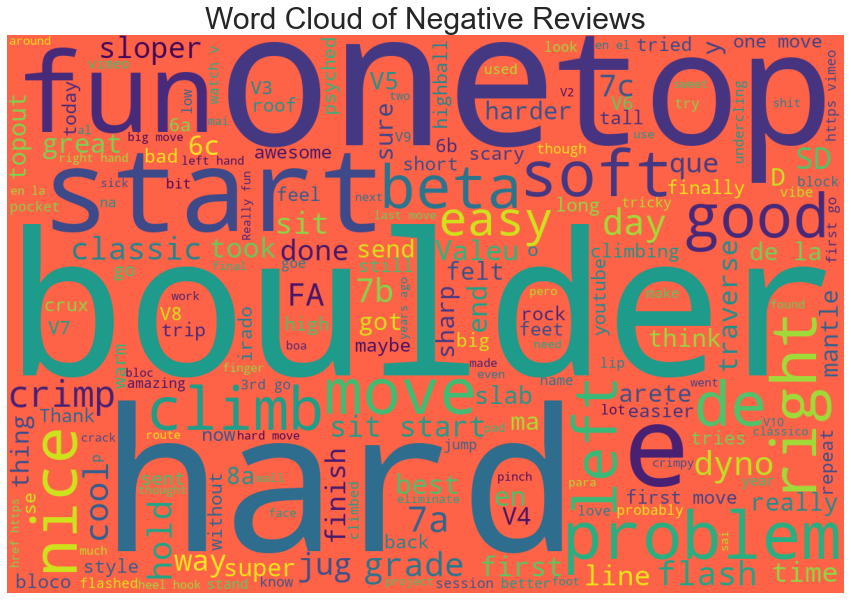

In [23]:
negative_sentiments = " ".join([text for text in ascents_df['comment'][ascents_df['Review_Sentiment'] == 0]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'tomato', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('../images/word_cloud_negative_boulders.png')
plt.show()

In [24]:
# converting the date into datetime format
ascents_df['date'] = pd.to_datetime(ascents_df['date'], errors = 'coerce')

# now extracting year from date
ascents_df['Year'] = ascents_df['date'].dt.year

# extracting the month from the date
ascents_df['month'] = ascents_df['date'].dt.month

# extracting the days from the date
ascents_df['day'] = ascents_df['date'].dt.day

/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


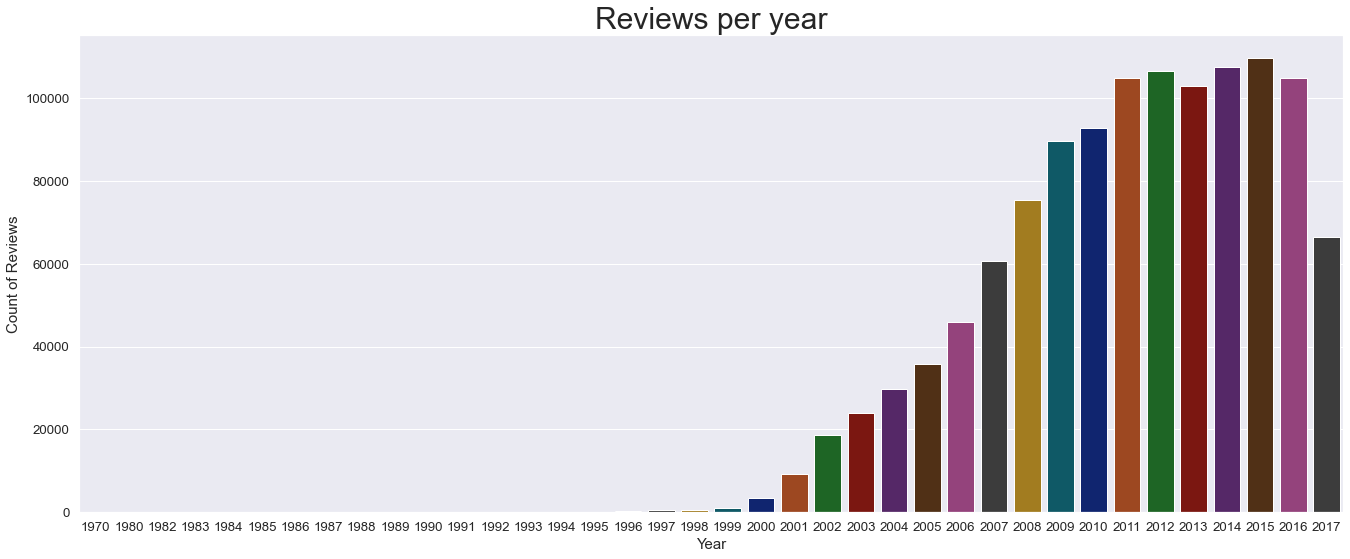

In [25]:
plt.rcParams['figure.figsize'] = (19, 8)
ax = sns.countplot(ascents_df['Year'], palette ='dark')
plt.title('Reviews per year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
ax.set(xlim=(None,None))
plt.tight_layout()
# x_labels = np.arange(1995, 2017)
# plt.set_xticklabels(x_labels)
# plt.xlim([1995, 2000])
plt.savefig('../images/reviews_per_year.png')

plt.show()

In [26]:
# from matplotlib.legend_handler import HandlerBase
# from matplotlib.text import Text
# import numpy as np
# import pandas as pd

# class TextHandler(HandlerBase):
#     def create_artists(self, legend, tup ,xdescent, ydescent,
#                         width, height, fontsize,trans):
#         tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
#                   ha="center", va="center", color=tup[1], fontweight="bold")
#         return [tx]


/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


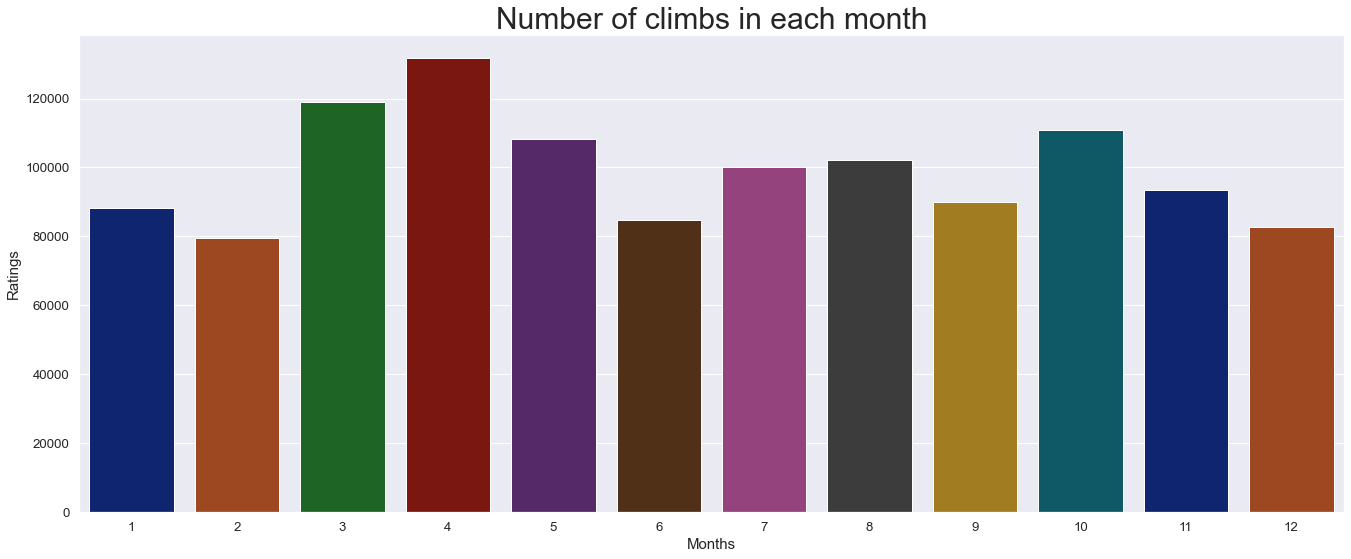

In [27]:
plt.rcParams['figure.figsize'] = (19, 8)
ax = sns.countplot(ascents_df['month'], palette ='dark') 
plt.title('Number of climbs in each month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
# plt.savefig('reviews_by_month.png')
# handltext = [1, 2,3,4,5,6,7,8,9,10,11,12]
# labels = ["January", 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'Decemeber']

# handles, labels = ax.get_legend_handles_labels()
# t = ax.get_xticklabels()
# labeldic = dict(zip(handltext, labels))
# labels = [labeldic[h.get_text()]  for h in t]
# handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

# ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

# plt.show()

# h,l = ax.get_legend_handles_labels()
# labels=["Mammal", "Bird", "Reptile", "Fish", "Amphibian", "Bug", "Invertebrate"]
# ax.legend(labels)
plt.tight_layout()
plt.savefig('../images/reviews_per_month.png')
plt.show()




# Data prep for feature engineering

In [28]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [29]:
ascents_df['review_clean'] = review_clean(ascents_df['comment'])

/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/cp/Documents/dsi/drug_sentiment_analysis/drug_sent_env/lib/p

In [30]:
ascents_df.review_clean.head()

0    
1    
2    
3    
4    
Name: review_clean, dtype: object

In [31]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
ascents_df['review_clean'] = ascents_df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [32]:
Snow_ball = SnowballStemmer("english")
ascents_df['review_clean'] = ascents_df['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [33]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [34]:
ascents_df['sentiment'] = sentiment(ascents_df['comment'])

In [35]:
ascents_df['sentiment_clean'] = sentiment(ascents_df['review_clean'])

In [36]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
ascents_df['review_clean_ss'] = review_clean(ascents_df['comment'])


In [37]:
ascents_df['sentiment_clean_ss'] = sentiment(ascents_df['review_clean_ss'])

In [38]:
ascents_df = ascents_df.dropna(how="any", axis=0)

In [39]:
#Word count in each review
ascents_df['count_word']=ascents_df["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
ascents_df['count_unique_word']=ascents_df["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
ascents_df['count_letters']=ascents_df["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
ascents_df["count_punctuations"] = ascents_df["comment"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
ascents_df["count_words_upper"] = ascents_df["comment"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
ascents_df["count_words_title"] = ascents_df["comment"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
ascents_df["count_stopwords"] = ascents_df["comment"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
ascents_df["mean_word_len"] = ascents_df["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [40]:
ascents_df.columns

Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped',
       'Review_Sentiment', 'Year', 'month', 'day', 'review_clean', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

In [41]:
ascents_df.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,156,11,51,,0,2,1,803,2000-08-27,2000,...,,0.0,0,0,0,0,0,0,0,NaN
1,157,11,51,,0,2,1,803,2000-08-27,2000,...,,0.0,0,0,0,0,0,0,0,NaN
2,158,11,49,,0,1,1,700,2001-04-16,2001,...,,0.0,0,0,0,0,0,0,0,NaN
3,159,11,46,,0,1,1,650,2000-08-27,2000,...,,0.0,0,0,0,0,0,0,0,NaN
4,169,6,57,,0,1,1,900,2000-07-01,2000,...,,0.0,0,0,0,0,0,0,0,NaN


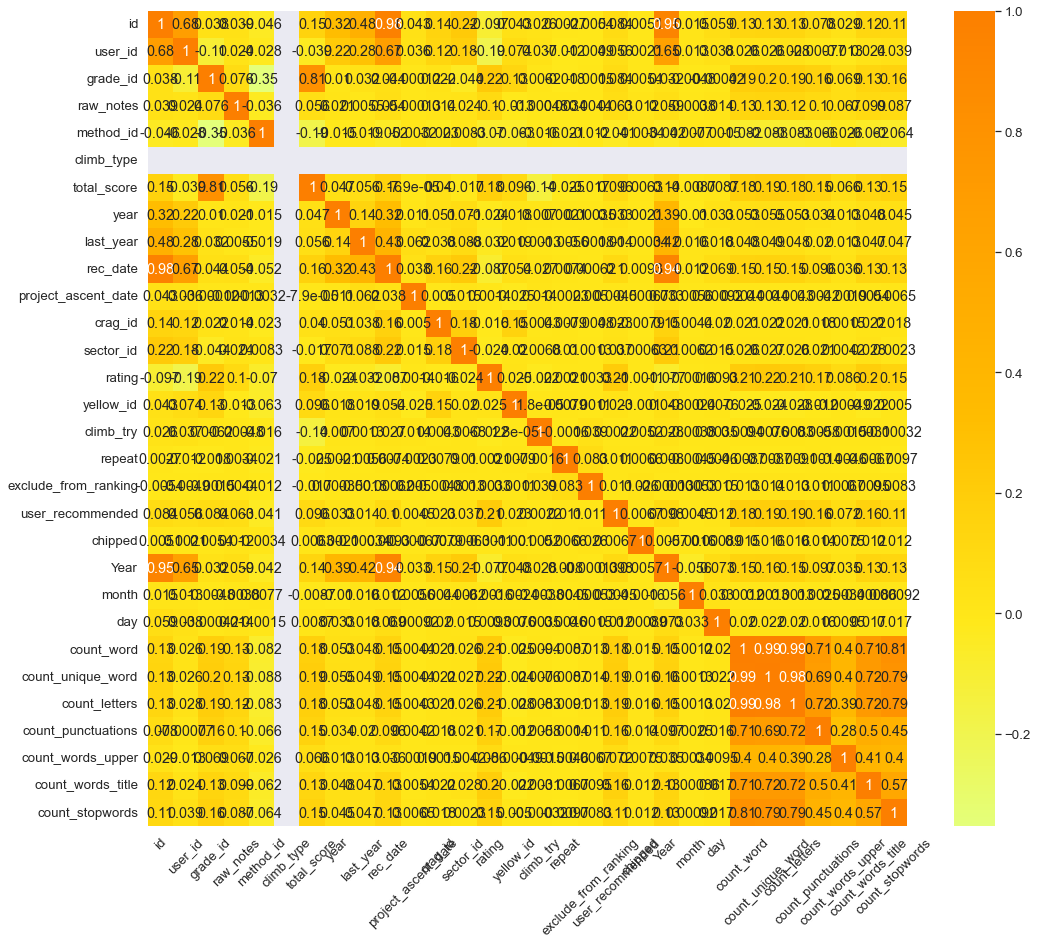

In [42]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = ascents_df.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

# Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['name', 'country']:
    label_encoder_feat[feature] = LabelEncoder()
    ascents_df[feature] = label_encoder_feat[feature].fit_transform(ascents_df[feature])

In [44]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [45]:
ascents_df.columns

Index(['id', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country', 'comment', 'rating', 'description', 'yellow_id', 'climb_try',
       'repeat', 'exclude_from_ranking', 'user_recommended', 'chipped',
       'Review_Sentiment', 'Year', 'month', 'day', 'review_clean', 'sentiment',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

In [46]:
ascents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191281 entries, 0 to 1236201
Data columns (total 45 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1191281 non-null  int64         
 1   user_id               1191281 non-null  int64         
 2   grade_id              1191281 non-null  int64         
 3   notes                 1191281 non-null  object        
 4   raw_notes             1191281 non-null  int64         
 5   method_id             1191281 non-null  int64         
 6   climb_type            1191281 non-null  int64         
 7   total_score           1191281 non-null  int64         
 8   date                  1191281 non-null  datetime64[ns]
 9   year                  1191281 non-null  int64         
 10  last_year             1191281 non-null  int64         
 11  rec_date              1191281 non-null  int64         
 12  project_ascent_date   1191281 non-null  in

In [47]:
features = ascents_df[['grade_id', 'method_id',
       'climb_type',  'year', 
        'name',  
       'country', 'climb_try',
       'repeat',  'user_recommended', 'chipped',
        'Year', 'month', 'day', 'sentiment',
       'sentiment_clean',  'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len']]
# features = ascents_df[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
#                    'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
#                    'count_punctuations', 'count_words_upper', 'count_words_title',
#                    'count_stopwords', 'mean_word_len']]

target = ascents_df['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (833896, 24)
The Test set size  (357385, 24)


In [48]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.6351665570743036
The confusion Matrix is 


array([[111683,    876,  42435],
       [ 16912,    912,  17366],
       [ 51681,   1116, 114404]])

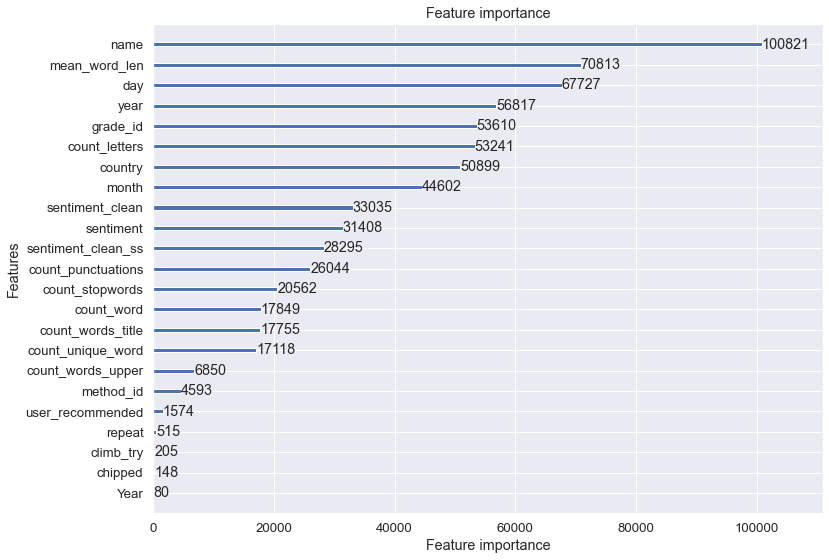

In [53]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model)
plt.savefig('feature_importance.png');

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.model_selection import RandomizedSearchCV




In [55]:
gkf = KFold(n_splits=5, shuffle=True, random_state=42)

In [56]:
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}



In [57]:
# gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)

In [58]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    
    
    )
    
    
    
    
    
    
#     fitted_model = gs.fit(X_train_data, y_train_data)
    fitted_model = rs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [60]:
model = LGBMClassifier()
# param_grid = {
#     'n_estimators': [400, 700, 1000],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,20,25],
#     'num_leaves': [50, 100, 200],
#     'reg_alpha': [1.1, 1.2, 1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'min_split_gain': [0.3, 0.4],
#     'subsample': [0.7, 0.8, 0.9],
#     'subsample_freq': [20]
# }

param_grid = {'subsample_freq': [20], 'subsample': [0.7], 'reg_lambda': [1.3], 'reg_alpha': [1.2], 'num_leaves': [200], 'n_estimators': [400], 'min_split_gain': [0.3], 'max_depth': [20], 'colsample_bytree': [0.7]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

print(model.best_score_)
print(model.best_params_)
# print ("The Accuracy of the model is : ", accuracy_score(y_test, pred))
print ("The confusion Matrix is ")
confusion_matrix(y_test, pred)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.7, max_depth=20, min_split_gain=0.3, n_estimators=400, num_leaves=200, reg_alpha=1.2, reg_lambda=1.3, subsample=0.7, subsample_freq=20; total time= 9.8min
[CV] END colsample_bytree=0.7, max_depth=20, min_split_gain=0.3, n_estimators=400, num_leaves=200, reg_alpha=1.2, reg_lambda=1.3, subsample=0.7, subsample_freq=20; total time= 9.8min
[CV] END colsample_bytree=0.7, max_depth=20, min_split_gain=0.3, n_estimators=400, num_leaves=200, reg_alpha=1.2, reg_lambda=1.3, subsample=0.7, subsample_freq=20; total time= 9.9min
0.6346618763579801
{'subsample_freq': 20, 'subsample': 0.7, 'reg_lambda': 1.3, 'reg_alpha': 1.2, 'num_leaves': 200, 'n_estimators': 400, 'min_split_gain': 0.3, 'max_depth': 20, 'colsample_bytree': 0.7}
The confusion Matrix is 


array([[110912,    392,  43690],
       [ 16852,    497,  17841],
       [ 50916,    399, 115886]])

In [ ]:
print(test)

In [ ]:
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 91.5min
# [Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 123.6min finished
# 0.6343692732918376
# {'subsample_freq': 20, 'subsample': 0.7, 'reg_lambda': 1.3, 'reg_alpha': 1.2, 'num_leaves': 200, 'n_estimators': 400, 'min_split_gain': 0.3, 'max_depth': 20, 'colsample_bytree': 0.7}
# The confusion Matrix is 
# array([[111118,    296,  43580],
#        [ 16886,    369,  17935],
#        [ 51241,    296, 115664]])

In [61]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc

In [62]:
def roc_curve_grapher(model, X_test ,y_test):
    """[Makes ROC curve graph given model and data]
    Args:
        model ([SKlearn classifer model]): [Logistic regression, Random Forrest, Gradient Boosting, etc]]
        X_test ([Pandas dataframe]): [Test feature data]
        y_test ([numpy array]): [target valudation data]
    """

    yhat = model.predict_proba(X_test)
    yhat = yhat[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, yhat)
    plt.plot([0,1], [0,1], linestyle='--', label='Random guess')
    plt.plot(fpr, tpr, marker='.', label=f'Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.suptitle('Model ROC curve', fontsize=20)
    plt.legend()
#     plt.savefig("Logistic Regression_ROC_curve.png", dpi=200)
    plt.show()

In [63]:
roc_curve_grapher(model, X_test, y_test)

ValueError: multiclass format is not supported

[CV] END colsample_bytree=0.7, max_depth=20, min_split_gain=0.3, n_estimators=400, num_leaves=200, reg_alpha=1.2, reg_lambda=1.3, subsample=0.7, subsample_freq=20; total time= 9.6min
[CV] END colsample_bytree=0.7, max_depth=20, min_split_gain=0.3, n_estimators=400, num_leaves=200, reg_alpha=1.2, reg_lambda=1.3, subsample=0.7, subsample_freq=20; total time= 4.7min


In [66]:
# logistic_y_hats = logistic_best_model.predict(X_test)
print(f"LGBM ROC Score = {roc_auc_score(y_test, pred, multi_class='ovr'):.4f}")

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
roc = {label: [] for label in multi_class_series.unique()}
for label in multi_class_series.unique():
    selected_classifier.fit(train_set_dataframe, train_class == label)
    predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
    roc[label] += roc_auc_score(test_class, predictions_proba[:,1])

In [68]:
from sklearn.metrics import confusion_matrix


In [69]:
confusion_matrix(y_test, pred)

array([[110912,    392,  43690],
       [ 16852,    497,  17841],
       [ 50916,    399, 115886]])

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

Confusion matrix,  non-normalized
[[110912    392  43690]
 [ 16852    497  17841]
 [ 50916    399 115886]]
Normalized confusion matrix
[[0.71558899 0.00252913 0.28188188]
 [0.47888605 0.01412333 0.50699062]
 [0.30451971 0.00238635 0.69309394]]


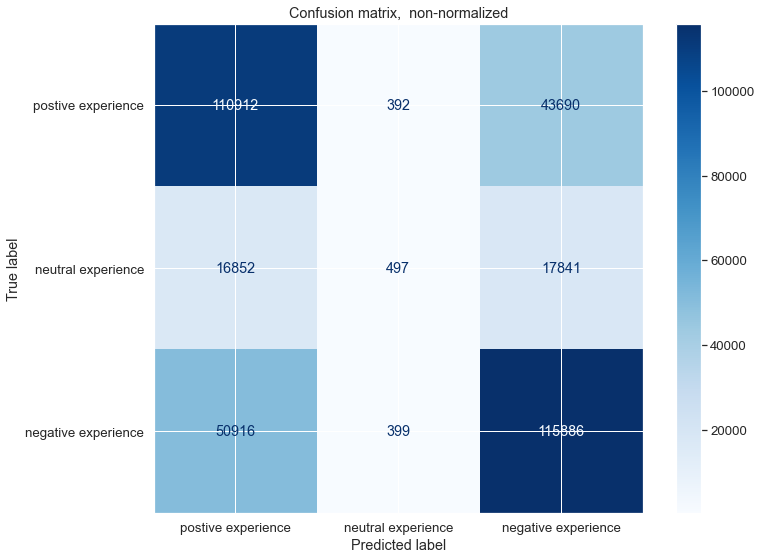

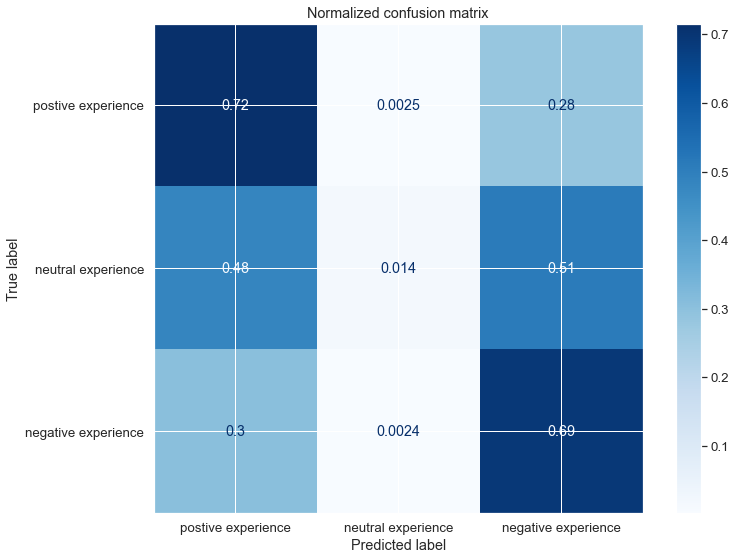

In [78]:
class_names = ['postive experience', 'neutral experience', 'negative experience']
titles_options = [
    ("Confusion matrix,  non-normalized", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.savefig('confusion_matrix.png');

plt.show()

Normalized confusion matrix
[[110912    392  43690]
 [ 16852    497  17841]
 [ 50916    399 115886]]


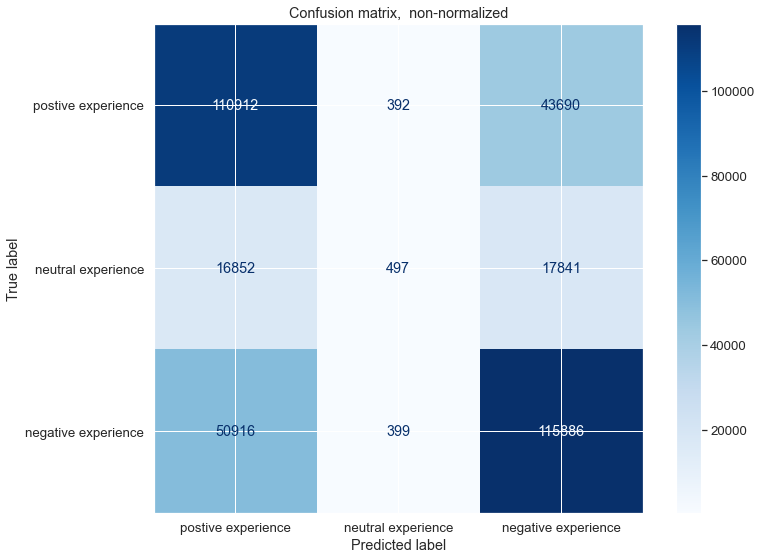

In [85]:
class_names = ['postive experience', 'neutral experience', 'negative experience']
# titles_options = [
#     ("Confusion matrix,  non-normalized", None),
#     ("Normalized confusion matrix", "true"),
# ]

# fontdict = {'fontsize':25}
# for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix,  non-normalized",fontdict=None)

print(title)
print(disp.confusion_matrix)
#     plt.savefig(f'{titles_options[0]}confusion_matrix.png');

plt.savefig('confusion_matrix_non_nomrmal.png');

plt.show()